In [70]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.base import clone
from cross_val import *
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.cm as cm
from sklearn.model_selection import cross_val_score

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
def plotNumbers(X, y, text = 'label: '):
    _, axes = plt.subplots(nrows=1, ncols=len(y), figsize=(10, 3))

    for ax, image, label in zip(axes, X, y):
        ax.set_axis_off()
        ax.imshow(image.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title(text + "%s" % str(label))

def scatter_labels(ax, x, y, labels, s = 0.01):
    for g in np.unique(labels):
        ix = np.where(labels == g)
        ax.scatter(x[ix], y[ix], label = g, s = s)
    ax.legend()

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [91]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=5000)

In [92]:
def invert(data):
    for d in data:
        d[:] = 255 - d[:]

In [93]:
invert([X_train, X_val])

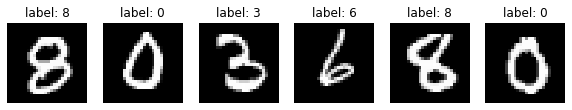

In [94]:
plotNumbers(X_train[:6], y_train[:6])

In [95]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

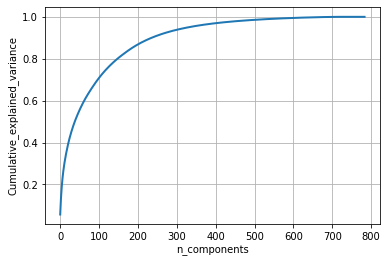

In [96]:
pca = PCA()
# PCA for dimensionality redcution (non-visualization)
pca.n_components = 784
pca_data = pca.fit_transform(X_train_scaled)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

#plot
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("Cumulative_explained_variance")
plt.show()

In [98]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=10000, test_size=2000)

invert([X_train, X_val])

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

acc_history = []
for i in range(2, 45, 2):
    clf = SVC(C=5, kernel='rbf', tol=1)

    pca = PCA()
    pca.n_components = i    
    pca_data = pca.fit_transform(X_train_scaled)

    scores = cross_val_score(clf, pca_data, y_train, cv=5)

    acc_history.append((i, max(scores)))

    print('components: ', i, 'acc: ', max(scores))

components:  2 acc:  0.3685
components:  4 acc:  0.703
components:  6 acc:  0.841
components:  8 acc:  0.89
components:  10 acc:  0.9145
components:  12 acc:  0.9295
components:  14 acc:  0.94
components:  16 acc:  0.944
components:  18 acc:  0.9485
components:  20 acc:  0.9475
components:  22 acc:  0.948
components:  24 acc:  0.9495
components:  26 acc:  0.954
components:  28 acc:  0.957
components:  30 acc:  0.961
components:  32 acc:  0.955
components:  34 acc:  0.952
components:  36 acc:  0.9585
components:  38 acc:  0.958
components:  40 acc:  0.957
components:  42 acc:  0.957
components:  44 acc:  0.9585


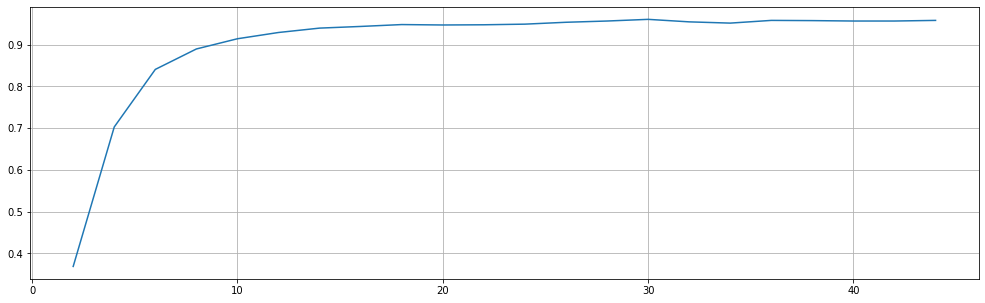

In [99]:
plt.rcParams["figure.figsize"] = (17,5)

acc_history = np.asarray(acc_history)

plt.plot(acc_history[:, 0], acc_history[:, 1])
plt.grid()

In [100]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=5000)

invert([X_train, X_val])

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

pca = PCA()
pca.n_components = 26    
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

In [105]:
print(X_train_pca.shape)

(65000, 26)


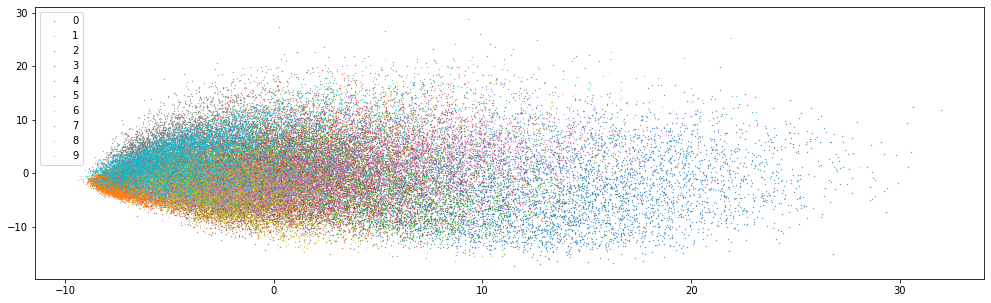

In [102]:
fig, ax = plt.subplots()

scatter_labels(ax, X_train_pca[:, 0], X_train_pca[:, 1], y_train, 0.1)

In [106]:
classifiers = [
    ('KNN', KNeighborsClassifier(3)),
    ('SVM', SVC(C=5, kernel='rbf', tol=1)),
    ('Tree', DecisionTreeClassifier(max_depth=None)),
    ('Log reg', LogisticRegression(C=50.0 / 65000, penalty="l1", solver="saga", tol=0.1)),
]

In [107]:
for name, clf in classifiers:
    clf_copy = clone(clf)
    clf_copy.fit(X_train_pca, y_train)

    score = clf_copy.score(X_val_pca, y_val)
    
    print(name, ' ', score)

KNN   0.951
SVM   0.9718
Tree   0.8528
Log reg   0.8468
